In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [2]:
# Load the training set for house prices dataset
trainset = pd.read_csv('train.csv', low_memory=False)

In [6]:
print('No. of houses: ', len(trainset))
print('No. of features: ', len(list(trainset)))

No. of houses:  1460
No. of features:  81


In [35]:
# Separate data into numerical and categorical values

# Split sale price from features
house_price = trainset['SalePrice']
house_id = trainset['Id']
features = trainset.drop(columns=['SalePrice', 'Id'])

# Separate features into numerical and categorical
num_features = features[features.dtypes.index[features.dtypes.values != object]]
cat_features = features[features.dtypes.index[features.dtypes.values == object]]

print('Number of numerical features: ', len(list(num_features)))
print('Number of categorical features: ', len(list(cat_features)))

Number of numerical features:  36
Number of categorical features:  43


In [53]:
num_features.iloc[:,1].name

'LotFrontage'

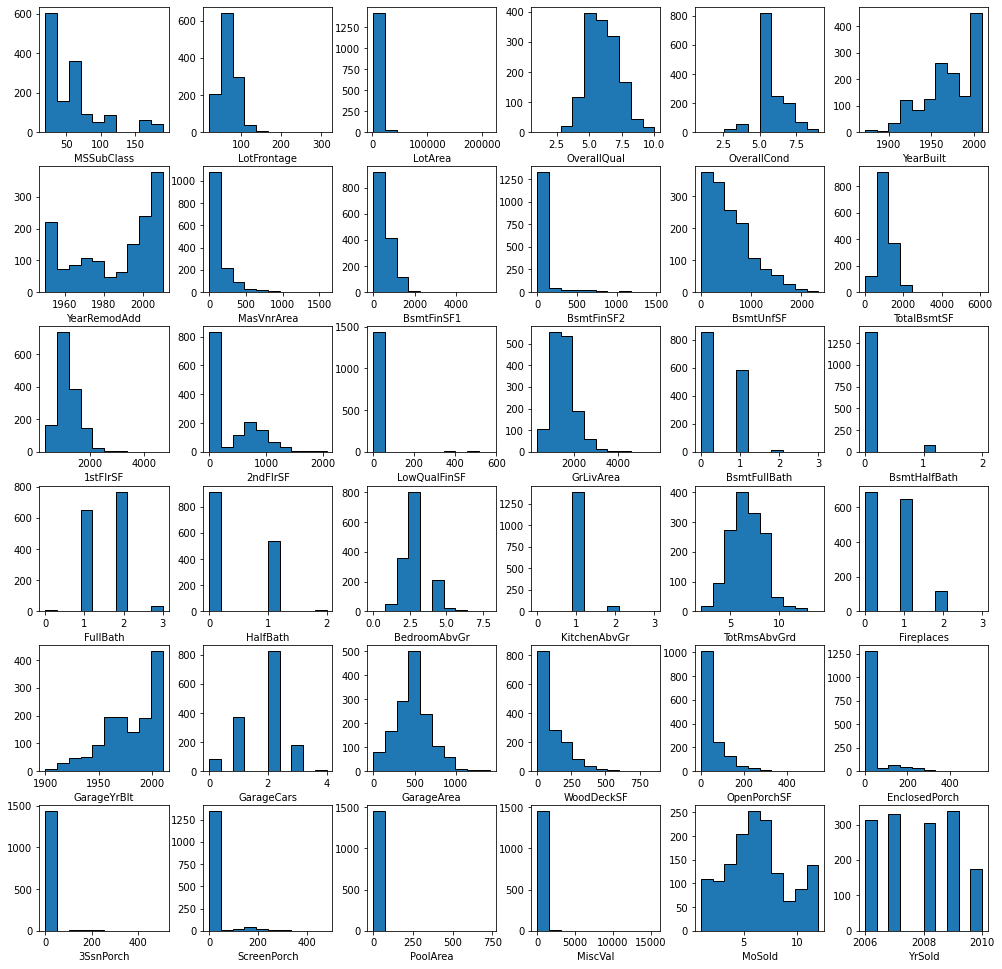

In [63]:
subplot_spacing = 0.27
fig, axs = plt.subplots(6, 6, figsize=(17,17), gridspec_kw = {'wspace':subplot_spacing, 'hspace':subplot_spacing})

alphabet_string = string.ascii_uppercase
alphabet_list = list(alphabet_string) + ['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ']

for i, ax in enumerate(axs.reshape(-1)):
    #ax.text(0.5, 0.5, s=alphabet_list[i])
    
    data = num_features.iloc[:,i]
    ax.hist(data, histtype='stepfilled', ec='k')
    ax.set_xlabel(data.name)

plt.show()

In [94]:
num_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

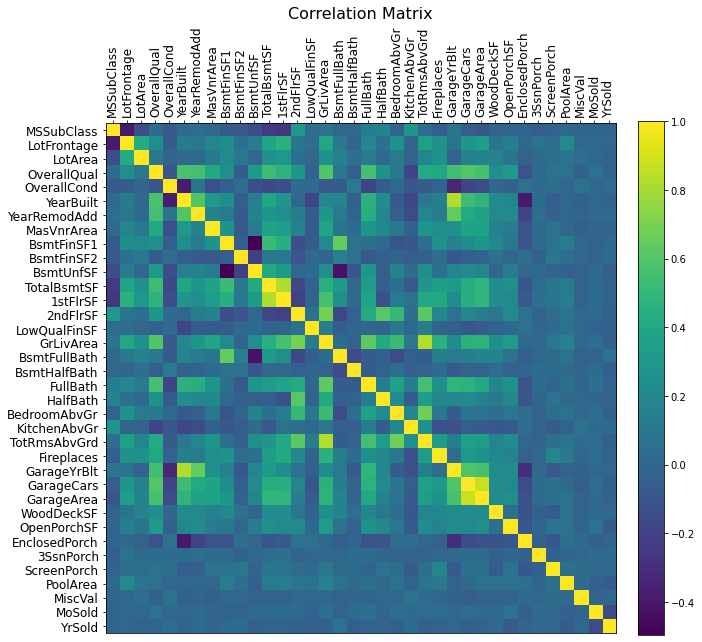

In [112]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
corr = ax.matshow(num_features.corr())
plt.title('Correlation Matrix', fontsize=16)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False) 
plt.xticks(range(len(num_features.columns)), num_features.columns, fontsize=12, rotation=90)
plt.yticks(range(len(num_features.columns)), num_features.columns, fontsize=12)

plt.colorbar(corr, fraction=0.046, pad=0.04)

plt.savefig('house_prices_correlation_matrix.png', format='png', dpi=100, facecolor='w', bbox_inches='tight')
plt.show()